In [ ]:
import requests
from geopy.distance import geodesic

# Define a function to fetch coordinates using Overpass API
def get_coordinates(city_name):
    overpass_url = "http://overpass-api.de/api/interpreter"
    overpass_query = f"""
    [out:json];
    node["name"="{city_name}"]["place"="city"];
    out body;
    """
    response = requests.get(overpass_url, params={'data': overpass_query})
    data = response.json()

    # Extract the first result's latitude and longitude
    if data['elements']:
        lat = data['elements'][0]['lat']
        lon = data['elements'][0]['lon']
        return lat, lon
    else:
        raise ValueError(f"Coordinates for {city_name} not found")

# Fetch coordinates for Place1 and Place2
place1_coords = get_coordinates("Plymouth")
place2_coords = get_coordinates("Swansea")

# Calculate the distance between Place1 and Place2
distance = geodesic(place1_coords, place2_coords).miles

print(f"The distance between Place1 and Place2 is approximately {distance:.2f} miles.")

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Example locations (latitude, longitude)
locations = [
    (50.3755, -4.1427, 'Plymouth'),
    (51.5074, -0.1278, 'London'),
    (54.9784, -1.6174, 'Newcastle upon Tyne'),
    (53.4084, -2.9916, 'Liverpool'),
    (51.6214, -3.9436, 'Swansea')
]

# Create a new figure
plt.figure(figsize=(10, 7))

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=40, urcrnrlat=60,
            llcrnrlon=-10, urcrnrlon=5, resolution='i')

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Draw map boundaries and parallels/meridians
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgreen', lake_color='aqua')

# Plot each location
for lat, lon, name in locations:
    x, y = m(lon, lat)
    m.plot(x, y, 'o', markersize=8, label=name)
    plt.text(x, y, ' ' + name, fontsize=12, ha='left', va='bottom')

# Add a legend
plt.legend(loc='best')

# Show the plot
plt.title('Locations on 2D Map')
plt.show()


In [ ]:
import math
import numpy as np
places=["Plymouth","Swansea"]
#places=["Plymouth","Swansea","Liverpool","Newcastle upon Tyne","London"]

#def circular_pairs(lst):
    #return list(zip(lst, lst[1:] + [lst[0]]))
    
def all_pairs(lst):
    pairs = []
    for i in range(len(lst)):
        for j in range(i + 1, len(lst)):
            pairs.append((lst[i], lst[j]))
    return pairs

result = all_pairs(places)
print(result)

#def map_dist(pair):
actual_dist=[]
for place1, place2 in result:
    coord1=get_coordinates(place1)
    coord2=get_coordinates(place2)
    dist=geodesic(coord1, coord2).miles
    actual_dist.append(dist)

    print(f"Distance in miles between {place1} & {place2} is {dist:.2f}")
    
    #lats.extend([coord1[0], coord2[0]])
    #print(lats)
    #lons.extend([coord1[1], coord2[1]])
    #print(lons)
    #pairs.append((coord1, coord2))
    #print(pairs)
#print(actual_dist[0])
#for k in range(10):
    #map_dist=actual_dist[k]
    #print(map_dist)



In [ ]:
!pip install folium --quiet

In [ ]:
import folium

In [ ]:
b=folium.Map(location=[52.158485418573186, -1.9805237617708022], zoom_start=6)
#b

In [ ]:
import sympy as sp
def predicted_distance(lat1, lon1, lat2, lon2):
    delta_x = (lon2 - lon1) 
    delta_y = (lat2 - lat1) 
    return np.sqrt(delta_x**2 + delta_y**2)

def partial_deri(lat1_val, lon1_val, lat2_val, lon2_val):
    lat1,lon1,lat2,lon2=sp.symbols('lat1 lon1 lat2 lon2')
    delta_x = (lon2 - lon1)
    delta_y = (lat2 - lat1)
    p = sp.sqrt(delta_x**2 + delta_y**2)
    
    partial_lat1 = sp.diff(p, lat1)
    partial_lon1 = sp.diff(p, lon1)
    partial_lat2 = sp.diff(p, lat2)
    partial_lon2 = sp.diff(p, lon2)
    
    values = {lat1: lat1_val, lon1: lon1_val, lat2: lat2_val, lon2: lon2_val}

    # Substitute the numerical values and compute the partial derivatives
    partial_lat1_num = partial_lat1.subs(values).evalf()
    partial_lon1_num = partial_lon1.subs(values).evalf()
    partial_lat2_num = partial_lat2.subs(values).evalf()
    partial_lon2_num = partial_lon2.subs(values).evalf()
    
    # Return the numerical values of the partial derivatives
    return partial_lat1_num, partial_lon1_num, partial_lat2_num, partial_lon2_num
    
    
# Define the cost function
def cost_func(locations, coord1, coord2):
    m = len(locations)
    total_cost = 0
    for i in range(m):
        for j in range(i + 1, m):
            #coord1=tuple(j*np.array(coord1))
            #coord2=tuple(j*np.array(coord2))
            #print(coord1)
            #print(coord2)
            #z=map(tuple,np.zeroes((2,),dtype='np.float64'))
            #print(z)
            
            pred_dist = predicted_distance(coord1[0], coord1[1], coord2[0], coord2[1])
            partial_deri(coord1[0], coord1[1], coord2[0], coord2[1])
            #print(pred_dist)
            
            coordi1 = get_coordinates(locations[i])
            coordi2 = get_coordinates(locations[j])
            map_dist = geodesic(coordi1, coordi2).miles
            #print(map_dist)
            
            error = pred_dist - map_dist
            #print(error)
            
            total_cost += error**2
            
            
    return total_cost / (2 * m)

#cost=cost_func(places)
#print(cost)

In [ ]:
import sympy as sp

def gradient_descent(locations, alpha, num_iterations):
    m = len(locations)
    coord1=(0.01,0.02)
    coord2=(0.03,0.01)
    for iteration in range(num_iterations):
        # Initialize gradients
        d_locations = np.zeros((m, 2))
        #print(d_locations)
        
        for i in range(m):
            for j in range(i + 1, m):
                coord1=tuple(j*np.array(coord1))
                #coord2=tuple(j*np.array(coord2))
                
                #print(f"Iteration {iteration+1}, Pair ({i},{j}): Coord1: {coord1}, Coord2: {coord2}")
                
                # Check if coord1 and coord2 have two elements
                if len(coord1) != 2 or len(coord2) != 2:
                    raise ValueError(f"Invalid coordinates: {coord1}, {coord2}")
                
                pred_dist = predicted_distance(coord1[0], coord1[1], coord2[0], coord2[1])
                #print(pred_dist)
                coordi1 = get_coordinates(locations[i])
                coordi2 = get_coordinates(locations[j])
                map_dist = geodesic(coordi1, coordi2).miles
                #print(map_dist)
                error = (pred_dist - map_dist)**2
                
                
            # Optionally print the cost at every iteration
            if (iteration + 1) % 1 == 0:
                print(coord1,coord2)
                cost = cost_func(locations,coord1,coord2)
                print(f"Iteration {iteration+1}: Cost = {cost:.4f}, Location1_lat={d_locations[i][0]}, Location1_lon = {d_locations[i][1]}, Location2_lat={d_locations[j][0]}, Location2_lon = {d_locations[j][1]}")
        #cost = cost_func(locations, theta1, theta2)
        #print(f"Iteration {iteration+1}: Cost = {cost:.4f}, Theta1 = {theta1:.4f}, Theta2 = {theta2:.4f}")
                
            # Calculate the partial derivatives
                d_locations[i][0],d_locations[i][1],d_locations[j][0],d_locations[j][1] = partial_deri(coord1[0], coord1[1], coord2[0], coord2[1])
                
                d_locations[i][0] += 2.0*np.sqrt(error)*d_locations[i][0]
                d_locations[i][1] += 2.0*np.sqrt(error)*d_locations[i][1]
                d_locations[j][0] += 2.0*np.sqrt(error)*d_locations[j][0]
                d_locations[j][1] += 2.0*np.sqrt(error)*d_locations[j][1]
        
        d_locations[i][0] -= alpha * d_locations[i][0] / m
        d_locations[i][1] -= alpha * d_locations[i][1] / m
        d_locations[j][0] -= alpha * d_locations[j][0] / m
        d_locations[j][1] -= alpha * d_locations[j][1] / m
        coord1=(d_locations[i][0],d_locations[i][1])
        coord2=(d_locations[j][0],d_locations[j][1])
        
    return locations

In [ ]:
# Example usage
alpha = 0.01  # Learning rate
num_iterations = 3  # Number of iterations
#theta1, theta2 = 69.0, 69.0  # Initial values of theta1 and theta2

# Assuming 'places' is a list of coordinates and 'get_coordinates' returns the latitude and longitude.
updated_locations = gradient_descent(places, alpha, num_iterations)

print("Updated locations:", updated_locations)
#print(f"Updated Theta1: {updated_theta1:.4f}, Updated Theta2: {updated_theta2:.4f}")

In [ ]:
import sympy as sp
import numpy as np
from geopy.distance import geodesic

# Define the symbolic variables
lat1, lon1, lat2, lon2, map_distance = sp.symbols('lat1 lon1 lat2 lon2 map_distance')

# Define the predicted distance function using Euclidean formula
predicted_distance = sp.sqrt((lon2 - lon1)**2 + (lat2 - lat1)**2)

# Define the cost function (squared error)
cost_function = (predicted_distance - map_distance)**2

# Compute partial derivatives of the cost function with respect to each variable
partial_lat1 = sp.diff(cost_function, lat1)
partial_lon1 = sp.diff(cost_function, lon1)
partial_lat2 = sp.diff(cost_function, lat2)
partial_lon2 = sp.diff(cost_function, lon2)

# Convert partial derivatives to lambda functions for efficient numerical computation
partial_lat1_fn = sp.lambdify((lat1, lon1, lat2, lon2, map_distance), partial_lat1)
partial_lon1_fn = sp.lambdify((lat1, lon1, lat2, lon2, map_distance), partial_lon1)
partial_lat2_fn = sp.lambdify((lat1, lon1, lat2, lon2, map_distance), partial_lat2)
partial_lon2_fn = sp.lambdify((lat1, lon1, lat2, lon2, map_distance), partial_lon2)

# Initialize values
lat1_val, lon1_val, lat2_val, lon2_val = 34.0522, -118.2437, 36.7783, -119.4179  # Example: Los Angeles to Fresno
learning_rate = 0.01
num_iterations = 100

# Calculate map distance using geopy
map_distance_val = geodesic((lat1_val, lon1_val), (lat2_val, lon2_val)).km

# Gradient Descent Algorithm
for i in range(num_iterations):
    # Compute partial derivatives
    grad_lat1 = partial_lat1_fn(lat1_val, lon1_val, lat2_val, lon2_val, map_distance_val)
    grad_lon1 = partial_lon1_fn(lat1_val, lon1_val, lat2_val, lon2_val, map_distance_val)
    grad_lat2 = partial_lat2_fn(lat1_val, lon1_val, lat2_val, lon2_val, map_distance_val)
    grad_lon2 = partial_lon2_fn(lat1_val, lon1_val, lat2_val, lon2_val, map_distance_val)

    # Update the variables
    lat1_val -= learning_rate * grad_lat1
    lon1_val -= learning_rate * grad_lon1
    lat2_val -= learning_rate * grad_lat2
    lon2_val -= learning_rate * grad_lon2

    # Compute the cost to monitor the optimization process
    predicted_dist = np.sqrt((lon2_val - lon1_val)**2 + (lat2_val - lat1_val)**2)
    cost = (predicted_dist - map_distance_val)**2
    print(f"Iteration {i+1}: Cost = {cost}, lat1 = {lat1_val}, lon1 = {lon1_val}, lat2 = {lat2_val}, lon2 = {lon2_val}")

print("Optimization complete.")


In [ ]:
pip install cartopy

In [ ]:
import numpy as np
from geopy.distance import geodesic
from sympy import symbols, diff, sqrt, lambdify
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Define the predicted distance function using SymPy
def predicted_distance_sym(lat1, lon1, lat2, lon2):
    delta_x = lon2 - lon1
    delta_y = lat2 - lat1
    return sqrt(delta_x**2 + delta_y**2)

# Actual geographical coordinates of two places
actual_lat1, actual_lon1 = 52.5200, 13.4050   # Example: Berlin
actual_lat2, actual_lon2 = 48.8566, 2.3522    # Example: Paris

# Compute the actual distance between two points using geopy
actual_distance = geodesic((actual_lat1, actual_lon1), (actual_lat2, actual_lon2)).kilometers

# Initialize the latitudes and longitudes
lat1, lon1, lat2, lon2 = 0.01, 0.02, 0.03, 0.04

# Define symbols for sympy
lat1_sym, lon1_sym, lat2_sym, lon2_sym = symbols('lat1_sym lon1_sym lat2_sym lon2_sym')

# Predicted distance with sympy symbols
predicted_dist = predicted_distance_sym(lat1_sym, lon1_sym, lat2_sym, lon2_sym)

# Cost function as the squared error
cost_function = (predicted_dist - actual_distance) ** 2

# Compute the partial derivatives of the cost function
grad_lat1 = diff(cost_function, lat1_sym)
grad_lon1 = diff(cost_function, lon1_sym)
grad_lat2 = diff(cost_function, lat2_sym)
grad_lon2 = diff(cost_function, lon2_sym)

# Convert the gradients to numerical functions using lambdify
grad_lat1_func = lambdify((lat1_sym, lon1_sym, lat2_sym, lon2_sym), grad_lat1, 'numpy')
grad_lon1_func = lambdify((lat1_sym, lon1_sym, lat2_sym, lon2_sym), grad_lon1, 'numpy')
grad_lat2_func = lambdify((lat1_sym, lon1_sym, lat2_sym, lon2_sym), grad_lat2, 'numpy')
grad_lon2_func = lambdify((lat1_sym, lon1_sym, lat2_sym, lon2_sym), grad_lon2, 'numpy')

# Gradient Descent parameters
learning_rate = 0.0001  # Reduced learning rate to prevent overshooting
num_iterations = 10  # Define the number of iterations

# Set up the map
plt.figure(figsize=(12, 6))
map = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='c')
map.drawcoastlines()
map.drawcountries()
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='lightgreen', lake_color='aqua')

# Plot initial actual locations
x_actual1, y_actual1 = map(actual_lon1, actual_lat1)
x_actual2, y_actual2 = map(actual_lon2, actual_lat2)
map.plot(x_actual1, y_actual1, 'ro', markersize=8, label='Actual Location 1')
map.plot(x_actual2, y_actual2, 'bo', markersize=8, label='Actual Location 2')

# Initialize plot points for the optimization locations
x_lat1, y_lat1 = map(lon1, lat1)
x_lat2, y_lat2 = map(lon2, lat2)
opt_loc1, = map.plot(x_lat1, y_lat1, 'r^', markersize=8, label='Optimized Location 1')
opt_loc2, = map.plot(x_lat2, y_lat2, 'b^', markersize=8, label='Optimized Location 2')

plt.legend()

# Function to update the plot points
def update_plot(lat1, lon1, lat2, lon2):
    x_lat1, y_lat1 = map(lon1, lat1)
    x_lat2, y_lat2 = map(lon2, lat2)
    opt_loc1.set_data(x_lat1, y_lat1)
    opt_loc2.set_data(x_lat2, y_lat2)
    plt.draw()
    plt.pause(0.01)  # Adjust pause duration if needed

# Perform Gradient Descent optimization with live plot updates
for i in range(num_iterations):
    # Evaluate gradients numerically
    grad_lat1_val = float(grad_lat1_func(lat1, lon1, lat2, lon2))
    grad_lon1_val = float(grad_lon1_func(lat1, lon1, lat2, lon2))
    grad_lat2_val = float(grad_lat2_func(lat1, lon1, lat2, lon2))
    grad_lon2_val = float(grad_lon2_func(lat1, lon1, lat2, lon2))

    # Update the variables using the gradients
    lat1 -= learning_rate * grad_lat1_val
    lon1 -= learning_rate * grad_lon1_val
    lat2 -= learning_rate * grad_lat2_val
    lon2 -= learning_rate * grad_lon2_val

    # Update the plot with new positions
    update_plot(lat1, lon1, lat2, lon2)

plt.title('Live Optimization of Lat/Lon Coordinates')
plt.show()


879.6993161290122
Location 1: (-377.584830, -458.555659)
Location 2: (40.109217, 315.655275)
Location 3: (337.565613, 143.020384)
879.699316129010


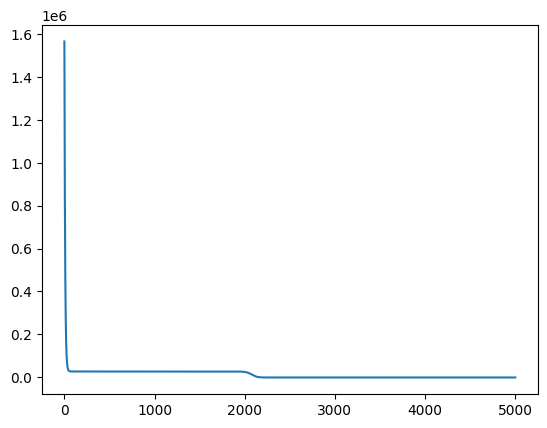

In [37]:
import numpy as np
from geopy.distance import geodesic
from sympy import symbols, diff, sqrt, lambdify
import matplotlib.pyplot as plt

# Define the predicted distance function using SymPy
def predicted_distance_sym(lat1, lon1, lat2, lon2):
    delta_x = lon2 - lon1
    delta_y = lat2 - lat1
    return sqrt(delta_x**2 + delta_y**2)

# Normalization functions for latitude and longitude
def normalize_latitude(lat):
    # Bring latitude within -360 to +360
    lat = lat % 360
    # Adjust to fit within -90 to +90
    if lat > 90 and lat <= 270:
        lat = 180 - lat
    elif lat > 270:
        lat = lat - 360
    return lat

def normalize_longitude(lon):
    # Bring longitude within -180 to +180
    lon = ((lon + 180) % 360) - 180
    return lon

# Function to clip gradients to prevent oscillations
def clip_gradient(grad, max_value=1.0):
    return np.clip(grad, -max_value, max_value)

# Actual geographical coordinates of three places
actual_lat1, actual_lon1 = 52.5200, 13.4050   # Berlin
actual_lat2, actual_lon2 = 48.8566, 2.3522    # Paris
actual_lat3, actual_lon3 = 51.5074, -0.1278   # London

# Compute the actual distances between each pair of points
actual_distance_12 = geodesic((actual_lat1, actual_lon1), (actual_lat2, actual_lon2)).kilometers
actual_distance_13 = geodesic((actual_lat1, actual_lon1), (actual_lat3, actual_lon3)).kilometers
actual_distance_23 = geodesic((actual_lat2, actual_lon2), (actual_lat3, actual_lon3)).kilometers
print(actual_distance_12 )

# Initialize the latitudes and longitudes for three locations
lat1, lon1 = 0.01, 0.02
lat2, lon2 = 0.03, 0.04
lat3, lon3 = 0.05, 0.06

# Define symbols for sympy
lat1_sym, lon1_sym, lat2_sym, lon2_sym, lat3_sym, lon3_sym = symbols(
    'lat1_sym lon1_sym lat2_sym lon2_sym lat3_sym lon3_sym')

# Predicted distances with sympy symbols for each pair
predicted_dist_12 = predicted_distance_sym(lat1_sym, lon1_sym, lat2_sym, lon2_sym)
predicted_dist_13 = predicted_distance_sym(lat1_sym, lon1_sym, lat3_sym, lon3_sym)
predicted_dist_23 = predicted_distance_sym(lat2_sym, lon2_sym, lat3_sym, lon3_sym)

# Cost function as the sum of squared errors for all pairs
cost_function = ((predicted_dist_12 - actual_distance_12) ** 2 +
                 (predicted_dist_13 - actual_distance_13) ** 2 +
                 (predicted_dist_23 - actual_distance_23) ** 2)

# Compute the partial derivatives of the cost function
grad_lat1 = diff(cost_function, lat1_sym)
grad_lon1 = diff(cost_function, lon1_sym)
grad_lat2 = diff(cost_function, lat2_sym)
grad_lon2 = diff(cost_function, lon2_sym)
grad_lat3 = diff(cost_function, lat3_sym)
grad_lon3 = diff(cost_function, lon3_sym)

# Convert the gradients to numerical functions using lambdify
grad_lat1_func = lambdify((lat1_sym, lon1_sym, lat2_sym, lon2_sym, lat3_sym, lon3_sym), grad_lat1, 'numpy')
grad_lon1_func = lambdify((lat1_sym, lon1_sym, lat2_sym, lon2_sym, lat3_sym, lon3_sym), grad_lon1, 'numpy')
grad_lat2_func = lambdify((lat1_sym, lon1_sym, lat2_sym, lon2_sym, lat3_sym, lon3_sym), grad_lat2, 'numpy')
grad_lon2_func = lambdify((lat1_sym, lon1_sym, lat2_sym, lon2_sym, lat3_sym, lon3_sym), grad_lon2, 'numpy')
grad_lat3_func = lambdify((lat1_sym, lon1_sym, lat2_sym, lon2_sym, lat3_sym, lon3_sym), grad_lat3, 'numpy')
grad_lon3_func = lambdify((lat1_sym, lon1_sym, lat2_sym, lon2_sym, lat3_sym, lon3_sym), grad_lon3, 'numpy')

# Gradient Descent parameters
learning_rate = 0.01
num_iterations = 5000

cost=[]
x=[]
# Gradient Descent loop
for i in range(num_iterations):
    # Calculate gradients
    x.append(i+1)
    #grad_lat1_val = clip_gradient(grad_lat1_func(lat1, lon1, lat2, lon2, lat3, lon3))
    #grad_lon1_val = clip_gradient(grad_lon1_func(lat1, lon1, lat2, lon2, lat3, lon3))
    #grad_lat2_val = clip_gradient(grad_lat2_func(lat1, lon1, lat2, lon2, lat3, lon3))
    #grad_lon2_val = clip_gradient(grad_lon2_func(lat1, lon1, lat2, lon2, lat3, lon3))
    #grad_lat3_val = clip_gradient(grad_lat3_func(lat1, lon1, lat2, lon2, lat3, lon3))
    #grad_lon3_val = clip_gradient(grad_lon3_func(lat1, lon1, lat2, lon2, lat3, lon3))
    grad_lat1_val = grad_lat1_func(lat1, lon1, lat2, lon2, lat3, lon3)
    grad_lon1_val = grad_lon1_func(lat1, lon1, lat2, lon2, lat3, lon3)
    grad_lat2_val = grad_lat2_func(lat1, lon1, lat2, lon2, lat3, lon3)
    grad_lon2_val = grad_lon2_func(lat1, lon1, lat2, lon2, lat3, lon3)
    grad_lat3_val = grad_lat3_func(lat1, lon1, lat2, lon2, lat3, lon3)
    grad_lon3_val = grad_lon3_func(lat1, lon1, lat2, lon2, lat3, lon3)

    # Update locations
    lat1 -= learning_rate * grad_lat1_val
    lon1 -= learning_rate * grad_lon1_val
    lat2 -= learning_rate * grad_lat2_val
    lon2 -= learning_rate * grad_lon2_val
    lat3 -= learning_rate * grad_lat3_val
    lon3 -= learning_rate * grad_lon3_val

    # Normalize the latitude and longitude values
    #lat1 = normalize_latitude(lat1)
    #lon1 = normalize_longitude(lon1)
    #lat2 = normalize_latitude(lat2)
    #lon2 = normalize_longitude(lon2)
    #lat3 = normalize_latitude(lat3)
    #lon3 = normalize_longitude(lon3)

    # Calculate updated cost
    updated_cost = ((predicted_distance_sym(lat1, lon1, lat2, lon2) - actual_distance_12) ** 2 +
                    (predicted_distance_sym(lat1, lon1, lat3, lon3) - actual_distance_13) ** 2 +
                    (predicted_distance_sym(lat2, lon2, lat3, lon3) - actual_distance_23) ** 2)
    cost.append(updated_cost)
    # Print updated locations and cost
    #print(f"Iteration {i+1}:")
    #print(f"Location 1: ({lat1:.6f}, {lon1:.6f})")
    #print(f"Location 2: ({lat2:.6f}, {lon2:.6f})")
    #print(f"Location 3: ({lat3:.6f}, {lon3:.6f})")
    #print(f"Cost: {updated_cost}\n")
print(f"Location 1: ({lat1:.6f}, {lon1:.6f})")
print(f"Location 2: ({lat2:.6f}, {lon2:.6f})")
print(f"Location 3: ({lat3:.6f}, {lon3:.6f})")
#dist=geodesic((lat1,lon1),(lat2,lon2)).kilometers
dist=predicted_distance_sym(lat1,lon1,lat2,lon2)
print(dist)
plt.plot(x, cost)
plt.show()

{(0, 1): 179.33440487789025, (0, 2): 245.2131093544739, (0, 3): 281.40151393040526, (0, 4): 184.86820889185262, (0, 5): 278.4203752471717, (0, 6): 201.67608828560105, (0, 7): 287.18577273764487, (0, 8): 129.21272236838507, (0, 9): 136.21271091363224, (0, 10): 263.929700863042, (0, 11): 102.56681350250993, (0, 12): 292.38694884909773, (1, 2): 74.32729111111344, (1, 3): 107.75756069774037, (1, 4): 49.64663220290803, (1, 5): 149.7484816832519, (1, 6): 184.18856216989573, (1, 7): 351.9364370615073, (1, 8): 61.73356848014629, (1, 9): 93.09378160749522, (1, 10): 229.4222591407563, (1, 11): 79.24018510077295, (1, 12): 231.6647822379754, (2, 3): 36.2899060618998, (2, 4): 64.53266318105935, (2, 5): 95.29764800574429, (2, 6): 186.19474203690518, (2, 7): 363.40319469219304, (2, 8): 116.72474749440087, (2, 9): 165.908622742257, (2, 10): 285.50827715806537, (2, 11): 150.7797332027635, (2, 12): 201.77374941509623, (3, 4): 100.19719061069813, (3, 5): 98.57067740461687, (3, 6): 211.74666526784688, (3,

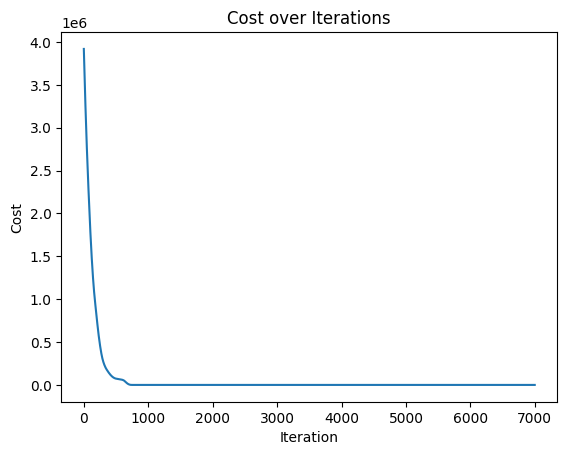

In [13]:
import numpy as np
from geopy.distance import geodesic
from sympy import symbols, diff, sqrt, lambdify
import matplotlib.pyplot as plt

# Define the predicted distance function using SymPy
def predicted_distance_sym(lat1, lon1, lat2, lon2):
    delta_x = lon2 - lon1
    delta_y = lat2 - lat1
    return sqrt(delta_x**2 + delta_y**2)

# Normalization functions for latitude and longitude
def normalize_latitude(lat):
    lat = lat % 360
    if lat > 90 and lat <= 270:
        lat = 180 - lat
    elif lat > 270:
        lat = lat - 360
    return lat

def normalize_longitude(lon):
    lon = ((lon + 180) % 360) - 180
    return lon

# Function to clip gradients to prevent oscillations
def clip_gradient(grad, max_value=1.0):
    return np.clip(grad, -max_value, max_value)

# Define actual geographical coordinates for 10 cities (randomly chosen for illustration)
actual_coords = [
    (52.631175943871, 1.4438059026964032),  # Norwich
    (50.910307779600494, -1.685596568246761), #Southhampton
    (50.70943994894834, -3.352854870350599), #Exeter
    (50.37549715914587, -3.9886187080727304), #Plymouth
    (51.44713035442605, -2.444620848400215), #Bristol
    (51.67537358796746, -4.918247021684257), #Pembroke
    (53.40128004270814, -3.221778430465314), #Liverpool
    (55.954637922470745, -2.815774829240603), #Edinburgh
    (51.76, -1.247), #Oxford
    (50.76455315081721, 0.4288200714415762), #Eastbourne
    (48.8566, 2.3522),   # Paris
    (51.5074, -0.1278),  # London
    (53.319328516885, -5.470531808221821), #Dublin
    
]

# Compute actual distances between each pair of points
num_cities = len(actual_coords)
actual_distances = {}
for i in range(num_cities):
    for j in range(i + 1, num_cities):
        actual_distances[(i, j)] = geodesic(actual_coords[i], actual_coords[j]).miles
print(actual_distances)

# Initialize the latitudes and longitudes randomly for 10 locations
#latitudes = np.random.uniform(-90, 90, num_cities)
#longitudes = np.random.uniform(-180, 180, num_cities)
#latitudes = np.random.uniform(-1, 1, num_cities)
#longitudes = np.random.uniform(-1, 1, num_cities)
latitudes = np.random.random(num_cities)
longitudes = np.random.random(num_cities)

# Define symbols for sympy
lat_symbols = symbols(f'lat0:{num_cities}') #####Mangesh : indexed beginnign with 0
lon_symbols = symbols(f'lon0:{num_cities}')

# Predicted distances with sympy symbols for each pair
predicted_distances = {}
for i in range(num_cities):
    for j in range(i + 1, num_cities):
        predicted_distances[(i, j)] = predicted_distance_sym(
            lat_symbols[i], lon_symbols[i], lat_symbols[j], lon_symbols[j])

# Cost function as the sum of squared errors for all pairs
cost_function = 0
for i in range(num_cities):
    for j in range(i + 1, num_cities):
        cost_function += (predicted_distances[(i, j)] - actual_distances[(i, j)]) ** 2

#cost_function = sum([(predicted_distances[(i, j)] - actual_distances[(i, j)]) ** 2
#                     for i in range(num_cities) for j in range(i + 1, num_cities)])

#cost_function = sum((predicted_distances[(i, j)] - actual_distances[(i, j)]) ** 2
#                    for i in range(num_cities) for j in range(i + 1, num_cities))

# Compute the partial derivatives of the cost function
grad_lat_funcs = []
grad_lon_funcs = []
for i in range(num_cities):
    grad_lat = diff(cost_function, lat_symbols[i])
    grad_lon = diff(cost_function, lon_symbols[i])
    grad_lat_funcs.append(lambdify(lat_symbols + lon_symbols, grad_lat, 'numpy'))
    grad_lon_funcs.append(lambdify(lat_symbols + lon_symbols, grad_lon, 'numpy'))

# Gradient Descent parameters
learning_rate = 0.5
num_iterations = 7000
cost_history = []  # To store cost values over iterations

# Gradient Descent loop
for iteration in range(num_iterations):
    # Collect all current latitudes and longitudes
    current_lat_lon = np.concatenate((latitudes, longitudes))

    # Calculate gradients for all cities
    grad_lats = np.array([clip_gradient(grad_lat_func(*current_lat_lon)) for grad_lat_func in grad_lat_funcs])
    grad_lons = np.array([clip_gradient(grad_lon_func(*current_lat_lon)) for grad_lon_func in grad_lon_funcs])

    # Update all locations
    latitudes -= learning_rate * grad_lats
    longitudes -= learning_rate * grad_lons

    # Normalize the latitude and longitude values
    #latitudes = np.array([normalize_latitude(lat) for lat in latitudes])
    #longitudes = np.array([normalize_longitude(lon) for lon in longitudes])

    # Calculate updated cost
    updated_cost = 0
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            updated_cost += (predicted_distance_sym(latitudes[i], longitudes[i], latitudes[j], longitudes[j]) - 
                        actual_distances[(i, j)]) ** 2
    #updated_cost = sum((predicted_distance_sym(latitudes[i], longitudes[i], latitudes[j], longitudes[j]) - 
       #                 actual_distances[(i, j)]) ** 2
        #               for i in range(num_cities) for j in range(i + 1, num_cities))

    # Append cost to history for plotting
    cost_history.append(float(updated_cost))
    
    if iteration %100 == 0:
        print(iteration)

    # Print updated locations and cost
    #print(f"Iteration {iteration + 1}:")
    #for i in range(num_cities):
        #print(f"Location {i+1}: ({latitudes[i]:.6f}, {longitudes[i]:.6f})")
        #for j in range(i + 1, num_cities):
            #print(predicted_distance_sym(latitudes[i], longitudes[i], latitudes[j], longitudes[j]))
    #print(f"Cost: {updated_cost}\n")



# Plotting the cost history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.show()


In [20]:
for i in range(num_cities):
        #print(f"Location {i+1}: ({latitudes[i]:.6f}, {longitudes[i]:.6f})")
        for j in range(i + 1, num_cities):
            print(predicted_distance_sym(latitudes[i], longitudes[i], latitudes[j], longitudes[j]))
        plt.plot(latitudes[i],longitudes[i],'.')

179.587332661204
245.192617621716
281.830582593153
185.494798269730
278.946082743110
201.566641468071
286.445843753566
129.343265297859
137.104537464585
263.783845234383
102.741628280412
238.805762927901
74.4427038113642
108.128883088339
50.2615647321685
150.591464244847
184.019047895465
351.855108127317
62.0925045318956
93.0137451831755
229.386490126473
79.2339618219690
134.961104488118
36.7577916446513
63.8672797391620
95.5028511036602
185.245584654360
362.754627885411
116.558458300435
166.006004563562
286.212285775712
150.650162222406
102.615936382379
100.023712341019
98.9388995815437
211.310711518658
388.762336756360
153.315645494595
196.554911015743
304.189409380568
186.116314371938
120.597198057987
107.802172356417
138.488613645151
311.831489763861
56.4034480085696
134.388276210993
278.765617074358
100.538245024900
85.6697306471936
138.726501930733
308.045886804284
158.171480138751
241.254001546564
377.137623169917
207.012813329269
45.5181120458499
177.682722822733
140.0858621771

In [21]:
%matplotlib qt

def quadrant(theta2):
    if theta2>0 and theta2<=np.pi/2:
        return 1
    elif theta2>np.pi/2 and theta2<=np.pi:
        return 2
    elif theta2>np.pi and theta2<=np.pi*3/2:
        return 3
    elif theta2>np.pi*3/2 and theta2<=2*np.pi:
        return 4
    else:
        return 0
    
pp = ['Norwich','Southhampton', 'Exeter','Plymouth','Bristol','Pembroke','Liverpool','Edinbrugh','Oxford','Eastbourne','Paris', 'London','Dublin']
for i in range(num_cities):
    print(f"Location {i}: ({latitudes[i]:.6f}, {longitudes[i]:.6f})")
    #plt.plot(latitudes[i],longitudes[i],'.')
    #plt.text(latitudes[i],longitudes[i],pp[i]+str(i),fontsize = 10)
    #for j in range(i + 1, num_cities):
    #    print(predicted_distance_sym(latitudes[i], longitudes[i], latitudes[j], longitudes[j]))
    
#Set London as the center
idx_London = pp.index('London')
idx_Paris = pp.index('Paris')
idx_Norwich = pp.index('Norwich')
for i in range(num_cities):
    latitudes[i]  -= latitudes[idx_London]
    longitudes[i] -= longitudes[idx_London]
    
#Check 
theta_Paris = np.arctan2(longitudes[idx_Paris], latitudes[idx_Paris])
theta_Norwich = np.arctan2(longitudes[idx_Norwich], latitudes[idx_Norwich])

#If paris rotated by +90 deg takes it to the same quadrant as Norwich then no reflection necessary
quadrant_paris = quadrant(np.arctan2(latitudes[idx_Paris],-longitudes[idx_Paris]))
quadrant_Norwich = quadrant(theta_Norwich)
r = 1
if quadrant_Norwich == quadrant_paris:
    print("Not Reflected")
else:
    print("Reflected")
    r = -1
for i in range(num_cities):
    latitudes[i] *= r

#Fix the angle between London and Paris
theta_actual = 313*np.pi/180
theta_sim = np.arctan2(longitudes[idx_Paris], latitudes[idx_Paris])
theta_rot = theta_actual - theta_sim

#rotate the coordinates of all the cities by theta_rot

for i in range(num_cities):
    latitudes[i], longitudes[i] = np.cos(theta_rot)*latitudes[i]-np.sin(theta_rot)*longitudes[i], np.sin(theta_rot)*latitudes[i]+np.cos(theta_rot)*longitudes[i]
plt.axis('equal')
for i in range(num_cities):
    
    plt.plot(latitudes[i],longitudes[i],'.')
    plt.text(latitudes[i],longitudes[i],pp[i],fontsize = 10)   
    


Location 0: (50.341535, 89.563229)
Location 1: (-58.959504, -52.932009)
Location 2: (-129.293209, -77.322296)
Location 3: (-153.958036, -104.576315)
Location 4: (-98.205510, -21.531755)
Location 5: (-206.002069, -20.431651)
Location 6: (-150.494806, 106.706015)
Location 7: (-159.874336, 284.141001)
Location 8: (-50.514657, 8.583548)
Location 9: (33.834623, -46.543993)
Location 10: (145.793894, -156.344810)
Location 11: (0.000000, 0.000000)
Location 12: (-176.179392, 13.955940)
Not Reflected


In [19]:
plt.plot(latitudes[i],longitudes[i],'.')

In [262]:
pip install matplotlib basemap


Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set up the map projection using Basemap
m = Basemap(projection='ortho', lat_0=0, lon_0=0)

# Get a grid of latitudes and longitudes
lons = np.linspace(-180, 180, 100)
lats = np.linspace(-90, 90, 100)
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Convert to map projection coordinates
x, y = m(lon_grid, lat_grid)

# Generate a 3D surface plot
z = np.sin(np.radians(lat_grid))  # Simple Z function

ax.plot_surface(x, y, z, cmap='viridis')

# Plot lat/lon points if needed
lon_points, lat_points = np.array([10, 20, 30]), np.array([10, 15, 25])
x_points, y_points = m(lon_points, lat_points)
z_points = np.sin(np.radians(lat_points))
ax.scatter(x_points, y_points, z_points, color='r', s=50)

plt.show()


/Users/mashi/opt/anaconda3/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:113: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


In [17]:
def sum(a, b):
    """
    >>> sum(4, 3)
    7

    >>> sum(-4, 5)
    1
    """
    return a + b

In [18]:
college_years = ['Freshman', 'Sophomore', 'Junior', 'Senior']
enumerate(college_years)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import procrustes

# Function to compute the distance between two points (lat, lon)
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers (mean radius)
    R = 6371.0
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

# Example latitudes and longitudes (original coordinates)
latitudes = [10, 20, 30]
longitudes = [50, 60, 70]

num_cities = len(latitudes)

# Simulated estimated latitudes and longitudes (not original but preserving distances)
estimated_latitudes = [12, 22, 33]
estimated_longitudes = [52, 61, 71]

# Step 1: Ensure distances are preserved
# Compute original distances
original_distances = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(i + 1, num_cities):
        original_distances[i, j] = haversine(latitudes[i], longitudes[i], latitudes[j], longitudes[j])

# Compute estimated distances
estimated_distances = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(i + 1, num_cities):
        estimated_distances[i, j] = haversine(estimated_latitudes[i], estimated_longitudes[i], estimated_latitudes[j], estimated_longitudes[j])

# Step 2: Align the estimated points with the original ones using Procrustes analysis
original_coords = np.array([latitudes, longitudes]).T
estimated_coords = np.array([estimated_latitudes, estimated_longitudes]).T

# Procrustes analysis for optimal rotation and translation in 2D
_, aligned_est, _ = procrustes(original_coords, estimated_coords)

# Step 3: Plot the original and estimated (aligned) points
plt.figure(figsize=(8, 8))

# Plot original points
#plt.scatter(original_coords[:, 1], original_coords[:, 0], color='blue', label='Original Coordinates')
#for i, (lat, lon) in enumerate(zip(latitudes, longitudes)):
#    plt.text(lon, lat, f"City {i+1}", fontsize=12, color='blue')

# Plot estimated points (after alignment)
plt.scatter(aligned_est[:, 1], aligned_est[:, 0], color='red', label='Estimated Coordinates (Aligned)')
for i, (lat, lon) in enumerate(aligned_est):
    plt.text(lon[1], lon[0], f"Est {i+1}", fontsize=12, color='red')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Original vs Estimated (Aligned) Coordinates')
plt.legend()
plt.grid(True)
plt.show()


IndexError: invalid index to scalar variable.